In [1]:
import pandas as pd
import numpy as np

In [2]:
sd = pd.read_csv('Smoking Data.csv')

In [3]:
sd.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [4]:
sd.shape

(1338, 6)

In [5]:
sd.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
for cl in sd.columns:
    if sd[cl].dtype == np.number:
        continue
    sd[cl] = le.fit_transform(sd[cl])

<ipython-input-7-417f9db1e626>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if sd[cl].dtype == np.number:


In [8]:
sd.head()

,region,age,sex,bmi,children,smoker
0,3,1,0,27.900,0,1
1,2,0,1,33.770,1,0
2,2,10,1,33.000,3,0
3,1,15,1,22.705,0,0
4,1,14,1,28.880,0,0


In [9]:
x = sd.drop(['smoker'], axis=1)
y = sd['smoker']

In [10]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.2, random_state=2)

In [11]:
xtrain.shape

(1070, 5)

In [12]:
xtest.shape

(268, 5)

In [13]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier()

In [14]:
DecTree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [15]:
DecTree.predict(xtest)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [16]:
testing = DecTree.predict(xtest)

In [17]:
ytest.head()

17      0
1091    0
273     0
270     0
874     0
Name: smoker, dtype: int32

In [18]:
xtest['Predicted'] = testing

<ipython-input-18-67cf9c399c9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['Predicted'] = testing


In [19]:
xtest.head()

,region,age,sex,bmi,children,Predicted
17,0,5,1,23.845,0,0
1091,0,37,0,29.830,0,0
273,0,32,1,27.455,1,0
270,2,0,1,29.370,1,0
874,0,26,1,21.850,3,0


In [21]:
DecTree.predict([[2,37,1,21,3]])

array([0])

In [22]:
DecTree.predict([[1,34,1,23,2]])

array([1])

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(737.2594267955801, 1333.8333333333333, 'children <= 3.5\ngini = 0.326\nsamples = 1070\nvalue = [851, 219]'),
 Text(611.5263812154697, 1283.5, 'sex <= 0.5\ngini = 0.332\nsamples = 1038\nvalue = [820, 218]'),
 Text(374.85808011049727, 1233.1666666666667, 'bmi <= 46.365\ngini = 0.296\nsamples = 509\nvalue = [417, 92]'),
 Text(369.92548342541437, 1182.8333333333333, 'age <= 44.5\ngini = 0.292\nsamples = 507\nvalue = [417, 90]'),
 Text(276.1868784530387, 1132.5, 'age <= 26.5\ngini = 0.279\nsamples = 489\nvalue = [407, 82]'),
 Text(171.6389502762431, 1082.1666666666665, 'age <= 24.5\ngini = 0.325\nsamples = 299\nvalue = [238, 61]'),
 Text(86.7828729281768, 1031.8333333333333, 'bmi <= 21.87\ngini = 0.301\nsamples = 276\nvalue = [225, 51]'),
 Text(39.460773480662986, 981.5, 'bmi <= 21.777\ngini = 0.459\nsamples = 28\nvalue = [18, 10]'),
 Text(34.528176795580116, 931.1666666666666, 'age <= 15.5\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(29.595580110497238, 880.8333333333333, 'r

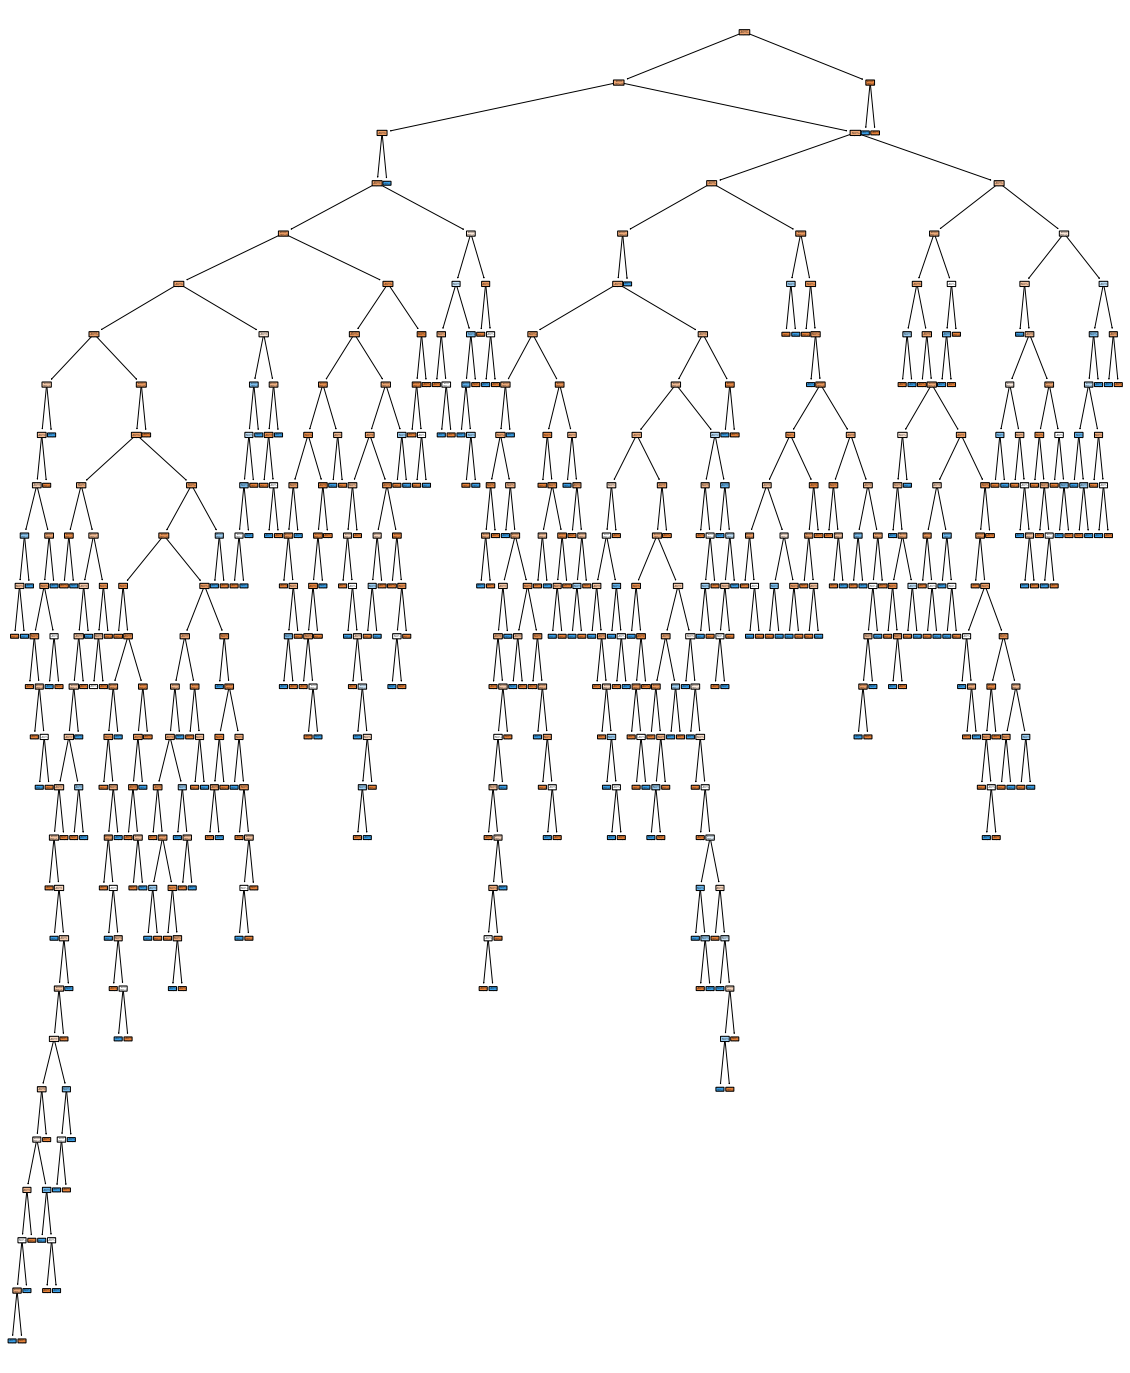

In [24]:
plt.figure(figsize=(20,25))
tree.plot_tree(DecTree, filled=True,rounded=True,feature_names=xtrain.columns)